In [90]:
!pip install varname

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from varname import nameof

In [36]:
#import glob
#print(glob.glob('*.feather'))

In [37]:
#from glob import glob
#filepaths = glob('*.feather')
#dfs = {f'df{n}': pd.read_feather(i) for n, i in enumerate(filepaths)}

In [38]:
#dfs = ['BF_df_CTU', 'BF_df_OU', 'BF_df_V', 'DT_df_CC', 'DF_df_JI', 'IADQ_df', 'IESR_df', 'NAQ_R_df', 'PCL5_df', 'PHQ9_GAD7_df', 'PID5_df', 'PRFQ_df', 'PRMQ_df', 'R_NEO_PI', 'RAQ_DDDT', 'sPID-5_df']

In [92]:
BF_df_CTU = pd.read_feather("BF_df_CTU.feather")
BF_df_OU = pd.read_feather("BF_df_OU.feather")
BF_df_V = pd.read_feather("BF_df_V.feather")
DT_df_CC = pd.read_feather("DT_df_CC.feather")
DT_df_JI = pd.read_feather("DT_df_JI.feather")
IADQ_df = pd.read_feather("IADQ_df.feather")
IESR_df = pd.read_feather("IESR_df.feather")
NAQ_R_df = pd.read_feather("NAQ_R_df.feather")
PCL5_df = pd.read_feather("PCL5_df.feather")
PHQ9_GAD7_df = pd.read_feather("PHQ9_GAD7_df.feather")
PID5_df = pd.read_feather("PID5_df.feather")
PRFQ_df = pd.read_feather("PRFQ_df.feather")
PRMQ_df = pd.read_feather("PRMQ_df.feather")
R_NEO_PI = pd.read_feather("R_NEO_PI.feather")
RAW_DDDT = pd.read_feather("RAW_DDDT.feather")
sPID_5_df = pd.read_feather("sPID-5_df.feather")

In [40]:
dfs = [BF_df_CTU, BF_df_OU, BF_df_V, DT_df_CC, DT_df_JI, IADQ_df, IESR_df, NAQ_R_df, PCL5_df, PHQ9_GAD7_df, PID5_df, PRFQ_df, PRMQ_df, R_NEO_PI, RAW_DDDT, sPID_5_df]

In [61]:
dfs_names = ['BF_df_CTU', 'BF_df_OU', 'BF_df_V', 'DT_df_CC', 'DF_df_JI', 'IADQ_df', 'IESR_df', 'NAQ_R_df', 'PCL5_df', 'PHQ9_GAD7_df', 'PID5_df', 'PRFQ_df', 'PRMQ_df', 'R_NEO_PI', 'RAQ_DDDT', 'sPID-5_df']

In [41]:
for i in dfs:
    n, p = i.shape
    print(n, p)

442 11
460 11
486 11
482 28
864 28
450 10
358 23
712 23
402 21
1118 17
824 221
678 19
1404 17
77687 31
986 13
1038 26


In [42]:
for i in dfs:
    i['CONDITION'] = i['CONDITION'].replace(['H', 'D', 'HONEST', 'DISHONEST', 'FAKE'], ['1', '0', '1', '0', '0'])

In [43]:
# check
for i in dfs:
    print(i.head)

<bound method NDFrame.head of      EX1G  EX2G  A1G  A2G  C1G  C2G  ES1G  ES2G  O1G  O2G CONDITION
0       4     4    4    4    4    5     4     4    4    4         1
1       4     2    2    4    4    5     3     4    4    4         1
2       4     2    2    4    4    4     3     4    4    4         1
3       4     2    2    4    2    4     5     5    4    2         1
4       3     2    3    4    5    5     4     4    5    5         1
..    ...   ...  ...  ...  ...  ...   ...   ...  ...  ...       ...
437     4     1    3    3    5    5     3     4    4    4         0
438     4     2    4    4    5    4     5     4    2    4         0
439     4     2    4    4    5    5     4     4    4    5         0
440     4     2    3    4    5    5     5     4    4    4         0
441     5     1    4    3    5    5     5     5    5    4         0

[442 rows x 11 columns]>
<bound method NDFrame.head of      EX1G  EX2G  A1G  A2G  C1G  C2G  ES1G  ES2G  O1G  O2G CONDITION
0       3     2    3    3    4

In [44]:
def pca_maker(df):
    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]
    center_function = lambda x: x - x.mean()
    X = center_function(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pca = PCA(5)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return pca, X_train_pca, X_test_pca

[0.35474923 0.13560575 0.10520792 0.08881985 0.07868395]


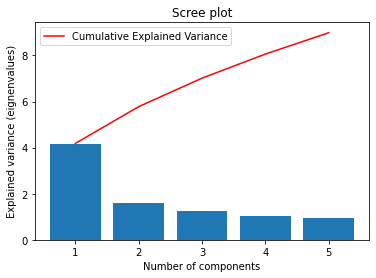

[0.3861734  0.11100193 0.09818971 0.09378013 0.07535743]


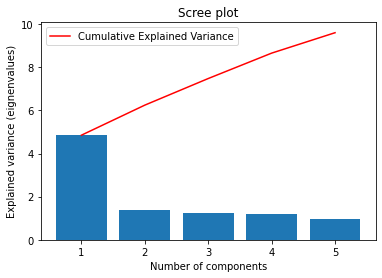

[0.36039243 0.12621939 0.11882242 0.08839938 0.07792358]


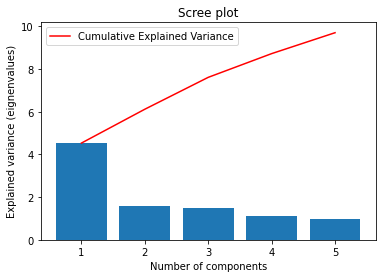

[0.24083827 0.08248011 0.07381956 0.05680626 0.04923314]


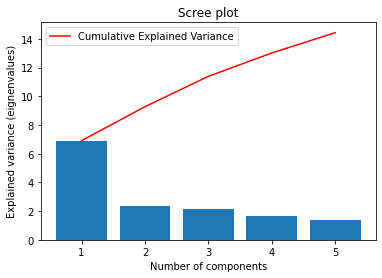

[0.19878958 0.11979103 0.07483762 0.04987398 0.04614931]


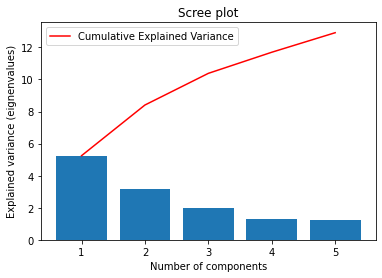

[0.75804858 0.06543716 0.0362315  0.03249609 0.02768119]


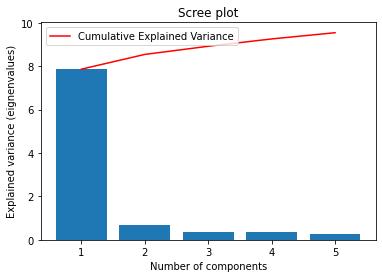

[0.68261088 0.04066235 0.03434223 0.02740401 0.02376409]


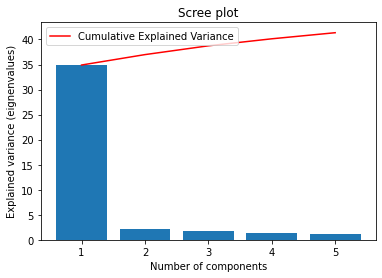

[0.8219388  0.02306383 0.01791139 0.01550528 0.01253316]


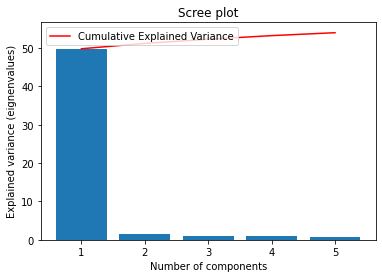

[0.65526556 0.05371404 0.03931854 0.02795442 0.02457824]


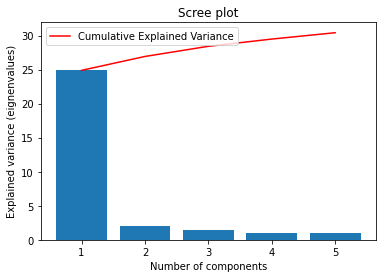

[0.65351624 0.05593097 0.05318156 0.03049127 0.02678306]


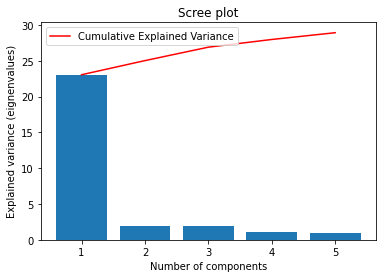

[0.43096101 0.06509547 0.03414075 0.02795918 0.0192046 ]


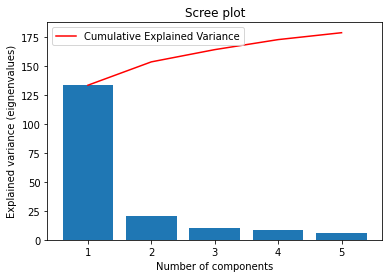

[0.37193336 0.13816369 0.07289029 0.06155196 0.05152456]


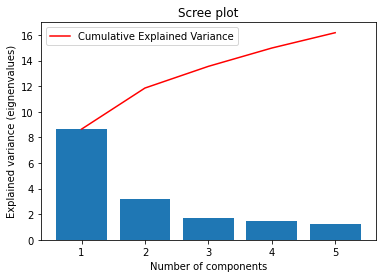

[0.61566447 0.05633066 0.0350211  0.03396794 0.03026257]


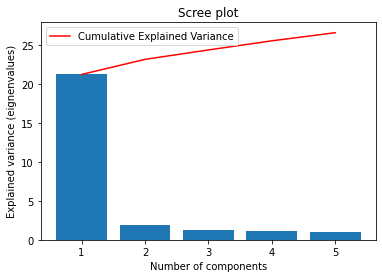

[0.33316754 0.08835314 0.07125367 0.04910328 0.03947175]


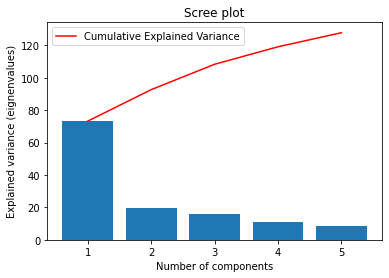

[0.44416168 0.13462946 0.08520559 0.06824445 0.05042119]


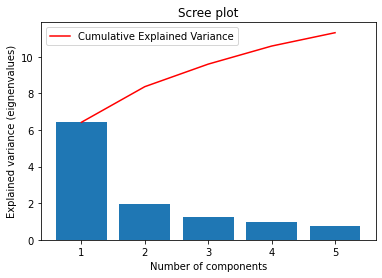

[0.54883669 0.05772089 0.05055621 0.03669    0.02825025]


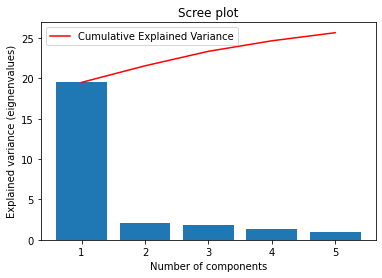

In [45]:
for i in dfs:
    pca,  X_train_pca, X_test_pca = pca_maker(i)
    print(pca.explained_variance_ratio_)
    plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
    plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
    plt.legend(loc='upper left')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance (eignenvalues)')
    plt.title('Scree plot')
 
    plt.show()

In [80]:
def prova(dfs,dfs_names,data):
    for i in range(len(dfs)):
        X = dfs[i].iloc[:,:-1]
        y = dfs[i].iloc[:,-1]
        center_function = lambda x: x - x.mean()
        X = center_function(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        pca = PCA(5)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        n_pcs= pca.components_.shape[0]
        
        most_important = [np.abs(pca.components_[k]).argmax() for k in range(n_pcs)]
        
        initial_feature_names = dfs[i].columns
        
        most_important_names = [initial_feature_names[most_important[k]] for k in range(n_pcs)]

        dic = {'PC{}'.format(k): most_important_names[k] for k in range(n_pcs)}
        
        comp_imp = pd.DataFrame(dic.items())
        
        pca_set = set(comp_imp.iloc[:,1])
        
        sub_col = list(pca_set)
        sub_col.append("CONDITION")
        df_5 = dfs[i][sub_col]    

        X_sub = df_5.iloc[:,:-1]
        y_sub = df_5.iloc[:,-1]
        X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)

        # LOGISTIC REGRESSION
        lr = LogisticRegression(random_state = 0, C=0.01)
        lr.fit(X_sub_train, y_train)
        y_lr_pred = lr.predict(X_sub_test)
        acc_lr = accuracy_score(y_test, y_lr_pred)

        # RANDOM FOREST
        rf = RandomForestClassifier(random_state=0)
        rf.fit(X_sub_train, y_train)
        y_rf_pred = rf.predict(X_sub_test)
        acc_rf = accuracy_score(y_test, y_rf_pred)

        #SVM
        svm = LinearSVC(loss='hinge')
        svm.fit(X_sub_train, y_train)
        y_pred_svm = svm.predict(X_sub_test)
        acc_svm = accuracy_score(y_pred_svm,y_test)

        data[dfs_names[i]] = [acc_lr,acc_rf, acc_svm]

        
    return data


In [82]:
data = {}
results_acc = prova(dfs,dfs_names,data)
print(results_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

{'BF_df_CTU': [0.7443609022556391, 0.706766917293233, 0.7368421052631579], 'BF_df_OU': [0.8043478260869565, 0.7463768115942029, 0.7681159420289855], 'BF_df_V': [0.7534246575342466, 0.7191780821917808, 0.7397260273972602], 'DT_df_CC': [0.6068965517241379, 0.6413793103448275, 0.6482758620689655], 'DF_df_JI': [0.5307692307692308, 0.5461538461538461, 0.5461538461538461], 'IADQ_df': [0.8444444444444444, 0.8296296296296296, 0.8518518518518519], 'IESR_df': [0.9074074074074074, 0.9074074074074074, 0.9074074074074074], 'NAQ_R_df': [0.9672897196261683, 0.9485981308411215, 0.9672897196261683], 'PCL5_df': [0.7933884297520661, 0.8099173553719008, 0.8347107438016529], 'PHQ9_GAD7_df': [0.9434523809523809, 0.9375, 0.9315476190476191], 'PID5_df': [0.8629032258064516, 0.8185483870967742, 0.8508064516129032], 'PRFQ_df': [0.8186274509803921, 0.8627450980392157, 0.8333333333333334], 'PRMQ_df': [0.8862559241706162, 0.9028436018957346, 0.8815165876777251], 'R_NEO_PI': [0.8965546831424036, 0.8796927961556614,

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [84]:
acc_df = pd.DataFrame(results_acc)
acc_df

,BF_df_CTU,BF_df_OU,BF_df_V,DT_df_CC,DF_df_JI,IADQ_df,IESR_df,NAQ_R_df,PCL5_df,PHQ9_GAD7_df,PID5_df,PRFQ_df,PRMQ_df,R_NEO_PI,RAQ_DDDT,sPID-5_df
0,0.744361,0.804348,0.753425,0.606897,0.530769,0.844444,0.907407,0.967290,0.793388,0.943452,0.862903,0.818627,0.886256,0.896555,0.733108,0.932692
1,0.706767,0.746377,0.719178,0.641379,0.546154,0.829630,0.907407,0.948598,0.809917,0.937500,0.818548,0.862745,0.902844,0.879693,0.699324,0.916667
2,0.736842,0.768116,0.739726,0.648276,0.546154,0.851852,0.907407,0.967290,0.834711,0.931548,0.850806,0.833333,0.881517,0.894967,0.733108,0.932692


In [85]:
mean_acc_df = acc_df.mean()
mean_acc_df

BF_df_CTU       0.729323
BF_df_OU        0.772947
BF_df_V         0.737443
DT_df_CC        0.632184
DF_df_JI        0.541026
IADQ_df         0.841975
IESR_df         0.907407
NAQ_R_df        0.961059
PCL5_df         0.812672
PHQ9_GAD7_df    0.937500
PID5_df         0.844086
PRFQ_df         0.838235
PRMQ_df         0.890205
R_NEO_PI        0.890405
RAQ_DDDT        0.721847
sPID-5_df       0.927350
dtype: float64

In [86]:
X_axis = np.arange(len(dfs_names))
X_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [88]:
std_acc = acc_df.std()
std_acc

BF_df_CTU       0.019893
BF_df_OU        0.029286
BF_df_V         0.017237
DT_df_CC        0.022169
DF_df_JI        0.008882
IADQ_df         0.011315
IESR_df         0.000000
NAQ_R_df        0.010792
PCL5_df         0.020798
PHQ9_GAD7_df    0.005952
PID5_df         0.022928
PRFQ_df         0.022464
PRMQ_df         0.011199
R_NEO_PI        0.009311
RAQ_DDDT        0.019505
sPID-5_df       0.009252
dtype: float64

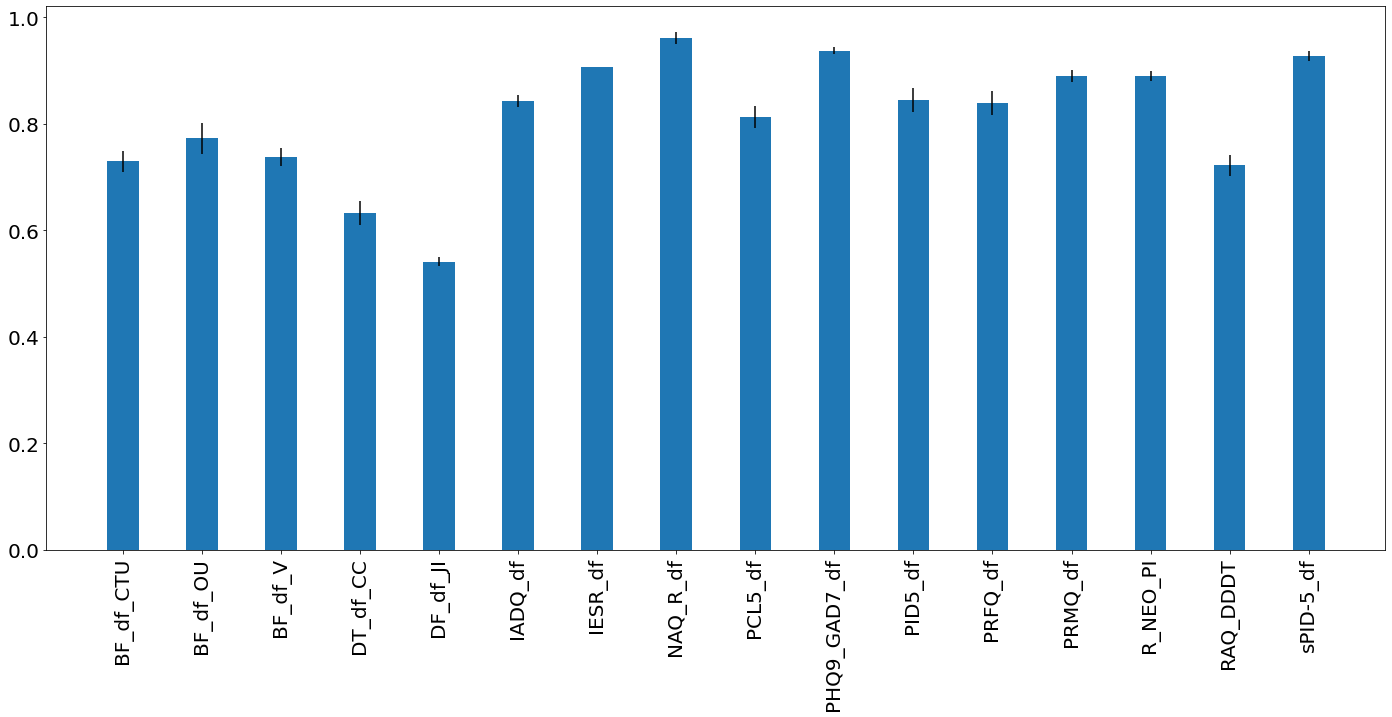

In [93]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.bar(X_axis, mean_acc_df,0.4, yerr = std_acc)
plt.xticks(X_axis, dfs_names, rotation=90)
plt.show()